In [10]:
import pandas as pd

# Cargar el dataset con departamentos encodeados
df = pd.read_csv("../deptos_encodeados.csv")

print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print("\nPrimeras filas:")
print(df.head())

print("\nInformación del dataset:")
df.info()

print("\n📊 Resumen de tipos de columnas:")
print(f"  - Columnas Depto_*: {len([col for col in df.columns if col.startswith('Depto_')])}")
print(f"  - Columnas tipoDeSuelo_*: {len([col for col in df.columns if col.startswith('tipoDeSuelo_')])}")
print(f"  - Columnas estacion_*: {len([col for col in df.columns if col.startswith('estacion_')])}")
print(f"  - Otras columnas: {len([col for col in df.columns if not any(col.startswith(p) for p in ['Depto_', 'tipoDeSuelo_', 'estacion_'])])}")

Dataset cargado: 5531 filas, 546 columnas

Primeras filas:
   distanciaRio  hayRioCercano  elevacion_m  pendiente_grados  temperature_2m  \
0          8.07          False          150              2.79       18.305905   
1          4.98          False            8              7.28       25.878348   
2         42.83          False          771              2.88       23.260704   
3         15.81          False          117              1.44       23.013005   
4         15.81          False          117              1.44       23.013005   

   total_evaporation_sum  volumetric_soil_water_layer_1  precipitation_week  \
0               1.148527                       0.467691               172.5   
1               3.236035                       0.206117                73.1   
2               0.983669                       0.165721                69.9   
3               3.030844                       0.458341                63.5   
4               3.030844                       0.458341    

In [11]:
# Preparar entradas (X) y salida (y) para el modelo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Columnas disponibles:\n", df.columns.tolist())
print("\nShape del dataframe:", df.shape)

# --- Definir target y features ---
target = 'seInunda'

# Columnas a EXCLUIR (solo el target)
columnas_a_excluir = ['seInunda']

# Obtener todas las features (TODAS las columnas excepto el target - 545 features)
features = [col for col in df.columns if col not in columnas_a_excluir]

print(f"\n🎯 Target: {target}")
print(f"📊 Features: {len(features)} columnas")
print("\n📋 Categorías de features:")
features_depto = [f for f in features if f.startswith('Depto_')]
features_suelo = [f for f in features if f.startswith('tipoDeSuelo_')]
features_estacion = [f for f in features if f.startswith('estacion_')]
features_otras = [f for f in features if not any(f.startswith(p) for p in ['Depto_', 'tipoDeSuelo_', 'estacion_'])]

print(f"  • Departamentos: {len(features_depto)} columnas")
print(f"  • Tipo de Suelo: {len(features_suelo)} columnas")
print(f"  • Estaciones: {len(features_estacion)} columnas")
print(f"  • Otras (continuas): {len(features_otras)} columnas")
print(f"\n  Columnas continuas: {features_otras}")

# Verificar que todas las columnas existen
columnas_faltantes = [col for col in features if col not in df.columns]
if columnas_faltantes:
    print(f"\n⚠️ ADVERTENCIA: Columnas faltantes: {columnas_faltantes}")
else:
    print("\n✓ Todas las columnas requeridas están presentes")

# --- Preparar X (features) y y (target) ---
X = df[features].to_numpy(dtype=float)
y = df[target].to_numpy()

# Convertir booleanos a 1/0 si es necesario
y = y.astype(int)

print(f"\n📐 Shapes: X={X.shape}, y={y.shape}")
print(f"📊 Distribución del target: {np.bincount(y)} (0=No Inunda, 1=Inunda)")
print(f"  - No Inunda: {np.sum(y==0)} ({100*np.sum(y==0)/len(y):.1f}%)")
print(f"  - Inunda: {np.sum(y==1)} ({100*np.sum(y==1)/len(y):.1f}%)")

# --- Split train/test con estratificación ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📦 Shapes después del split:")
print(f"  X_train={X_train.shape}, y_train={y_train.shape}")
print(f"  X_test={X_test.shape}, y_test={y_test.shape}")

# --- Escalado (StandardScaler) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Datos escalados y listos para el modelo!")
print(f"\n📌 Variables disponibles para el modelo:")
print(f"   - X_train_scaled, X_test_scaled: datos de entrada escalados")
print(f"   - y_train, y_test: etiquetas binarias (0/1)")
print(f"   - scaler: para transformar datos nuevos")
print(f"   - features: lista de {len(features)} nombres de columnas usadas")

Columnas disponibles:
 ['distanciaRio', 'hayRioCercano', 'elevacion_m', 'pendiente_grados', 'temperature_2m', 'total_evaporation_sum', 'volumetric_soil_water_layer_1', 'precipitation_week', 'tipoDeSuelo_Alfisoles', 'tipoDeSuelo_Aridisoles', 'tipoDeSuelo_Complejo indiferenci', 'tipoDeSuelo_Entisoles', 'tipoDeSuelo_Esteros', 'tipoDeSuelo_Inceptisoles', 'tipoDeSuelo_Lagunas', 'tipoDeSuelo_Medano', 'tipoDeSuelo_Miscelaneas', 'tipoDeSuelo_Molisoles', 'tipoDeSuelo_Rio', 'tipoDeSuelo_Roca', 'tipoDeSuelo_Salinas', 'tipoDeSuelo_Ultisoles', 'tipoDeSuelo_Vertisoles', 'estacion_invierno', 'estacion_otoño', 'estacion_primavera', 'estacion_verano', 'seInunda', 'Depto_2001', 'Depto_2002', 'Depto_2003', 'Depto_2004', 'Depto_2005', 'Depto_2006', 'Depto_2007', 'Depto_2008', 'Depto_2009', 'Depto_2010', 'Depto_2011', 'Depto_2012', 'Depto_2013', 'Depto_2014', 'Depto_2015', 'Depto_6007', 'Depto_6014', 'Depto_6021', 'Depto_6028', 'Depto_6042', 'Depto_6049', 'Depto_6056', 'Depto_6063', 'Depto_6070', 'Depto_60

In [12]:
# Búsqueda EXTENSA de hiperparámetros con Keras Tuner
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.metrics import fbeta_score

# Definir métrica F2-score personalizada para Keras
class F2Score(keras.metrics.Metric):
    def __init__(self, name='f2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision_metric = keras.metrics.Precision()
        self.recall_metric = keras.metrics.Recall()
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision_metric.update_state(y_true, y_pred, sample_weight)
        self.recall_metric.update_state(y_true, y_pred, sample_weight)
    
    def result(self):
        precision = self.precision_metric.result()
        recall = self.recall_metric.result()
        # F2 = (1 + 2^2) * (precision * recall) / (2^2 * precision + recall)
        # F2 = 5 * (precision * recall) / (4 * precision + recall)
        numerator = 5.0 * precision * recall
        denominator = 4.0 * precision + recall
        return tf.where(
            tf.equal(denominator, 0),
            0.0,
            numerator / denominator
        )
    
    def reset_state(self):
        self.precision_metric.reset_state()
        self.recall_metric.reset_state()

# Definir la función que construye el modelo con hiperparámetros variables
def build_model(hp):
    """
    Construye un modelo con hiperparámetros a optimizar (BÚSQUEDA EXTENSA):
    - Número de capas ocultas: 2-8 capas
    - Número de neuronas por capa: 16-512 (pasos de 16)
    - Tasa de dropout: 0.0-0.6 (pasos de 0.05)
    - Learning rate: más opciones
    - Activación en capas ocultas: más opciones
    - Batch Normalization opcional
    """
    model = keras.Sequential()
    
    # Capa de entrada
    input_dim = X_train_scaled.shape[1]
    
    # Número de capas ocultas a probar (AMPLIADO: 2-8)
    n_layers = hp.Int('n_layers', min_value=2, max_value=8, step=1)
    
    for i in range(n_layers):
        # Número de neuronas por capa (AMPLIADO: 16-512, pasos de 16)
        units = hp.Int(f'units_{i}', min_value=16, max_value=512, step=16)
        
        # Función de activación (AMPLIADO: más opciones)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'elu', 'selu', 'swish'])
        
        if i == 0:
            model.add(layers.Dense(units, activation=activation, input_dim=input_dim))
        else:
            model.add(layers.Dense(units, activation=activation))
        
        # Batch Normalization opcional (NUEVO)
        use_batch_norm = hp.Boolean(f'batch_norm_{i}')
        if use_batch_norm:
            model.add(layers.BatchNormalization())
        
        # Dropout para regularización (AMPLIADO: 0.0-0.6, pasos de 0.05)
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.6, step=0.05)
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))
    
    # Capa de salida (clasificación binaria con sigmoid)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Learning rate variable (AMPLIADO: más opciones)
    learning_rate = hp.Choice('learning_rate', values=[5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5])
    
    # Optimizador a probar (AMPLIADO: más opciones)
    optimizer_name = hp.Choice('optimizer', values=['adam', 'adamw', 'sgd', 'rmsprop', 'nadam'])
    
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'adamw':
        optimizer = keras.optimizers.AdamW(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        momentum = hp.Float('sgd_momentum', min_value=0.8, max_value=0.99, step=0.01)
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer_name == 'nadam':
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    # Compilar el modelo
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Recall(name='recall'),
            keras.metrics.Precision(name='precision'),
            keras.metrics.AUC(name='auc'),
            F2Score(name='f2_score')
        ]
    )
    
    return model

# Configurar el tuner con BÚSQUEDA MÁS EXTENSA
# OBJETIVO: Maximizar F2-SCORE en validación (balance con énfasis en recall)
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_f2_score', direction='max'),
    max_trials=50,  # AMPLIADO: de 20 a 50 trials
    executions_per_trial=2,
    directory='../hyperparameter_tuning',
    project_name='inundacion_deptos_encoded_f2',
    overwrite=True
)

print("="*80)
print("🔍 CONFIGURACIÓN DE BÚSQUEDA DE HIPERPARÁMETROS (EXTENSA)")
print("="*80)
print(f"  • OBJETIVO: Maximizar F2-SCORE (prioriza recall, balanceado con precision)")
print(f"  • Max trials: 50 (vs 20 anterior)")
print(f"  • Capas: 2-8 (vs 1-6 anterior)")
print(f"  • Neuronas por capa: 16-512 en pasos de 16 (vs 8-256 en pasos de 8)")
print(f"  • Dropout: 0.0-0.6 en pasos de 0.05 (vs 0.0-0.5 en pasos de 0.1)")
print(f"  • Activaciones: 5 opciones (vs 3 anterior)")
print(f"  • Learning rates: 7 opciones (vs 3 anterior)")
print(f"  • Optimizadores: 5 opciones (vs 3 anterior)")
print(f"  • Batch Normalization: opcional en cada capa (NUEVO)")
print(f"  • Momentum SGD: 0.8-0.99 (NUEVO)")
print("="*80)
print("\nℹ️  F2-Score = (5 * precision * recall) / (4 * precision + recall)")
print("   → Penaliza más los falsos negativos (recall) que los falsos positivos")
print("   → Balance: 80% énfasis en recall, 20% en precision")
print("="*80)

print("\nEspacio de búsqueda de hiperparámetros:")
print(tuner.search_space_summary())

# Configurar callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,  # Mayor paciencia para modelos más complejos
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Ejecutar la búsqueda
print("\n🔍 Iniciando búsqueda EXTENSA de hiperparámetros...")
print("⚠️  Esto puede tomar VARIAS HORAS dependiendo del hardware.\n")

tuner.search(
    X_train_scaled, y_train,
    epochs=150,  # Más épocas para convergencia
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n" + "="*80)
print("🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
print("="*80)
print(f"Número de capas: {best_hps.get('n_layers')}")
for i in range(best_hps.get('n_layers')):
    print(f"  Capa {i+1}:")
    print(f"    • Neuronas: {best_hps.get(f'units_{i}')}")
    print(f"    • Activación: {best_hps.get(f'activation_{i}')}")
    print(f"    • Batch Norm: {best_hps.get(f'batch_norm_{i}')}")
    print(f"    • Dropout: {best_hps.get(f'dropout_{i}')}")
print(f"\nOptimizer: {best_hps.get('optimizer')}")
if best_hps.get('optimizer') == 'sgd':
    print(f"  • Momentum: {best_hps.get('sgd_momentum')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")
print("="*80)

# Construir y entrenar el mejor modelo
print("\n📊 Entrenando el mejor modelo con el dataset completo...")
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train_scaled, y_train,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar en el conjunto de test
print("\n📈 Evaluación en el conjunto de test:")
test_results = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Recall: {test_results[2]:.4f}")
print(f"Test Precision: {test_results[3]:.4f}")
print(f"Test AUC: {test_results[4]:.4f}")
print(f"Test F2-Score: {test_results[5]:.4f}  ← ¡Métrica principal optimizada!")

# Calcular F2-score manualmente para verificación
y_pred_test = (best_model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).flatten()
f2_manual = fbeta_score(y_test, y_pred_test, beta=2)
print(f"\nVerificación F2-Score (manual): {f2_manual:.4f}")

# Guardar el mejor modelo con nombre descriptivo
model_filename = 'modelo_deptos_encoded_545features.h5'
best_model.save(model_filename)
print(f"\n✅ Modelo guardado como '{model_filename}'")
print(f"   Ubicación: ./models/{model_filename}")


Trial 50 Complete [00h 00m 43s]
val_f2_score: 0.8070397675037384

Best val_f2_score So Far: 0.8546400368213654
Total elapsed time: 01h 20m 28s

🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:
Número de capas: 2
  Capa 1:
    • Neuronas: 512
    • Activación: relu
    • Batch Norm: True
    • Dropout: 0.5
  Capa 2:
    • Neuronas: 288
    • Activación: selu
    • Batch Norm: True
    • Dropout: 0.4

Optimizer: rmsprop
Learning rate: 0.05

📊 Entrenando el mejor modelo con el dataset completo...
Epoch 1/150
Epoch 1/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6499 - auc: 0.6980 - f2_score: 0.6435 - loss: 1.0314 - precision: 0.6461 - recall: 0.6428 - val_accuracy: 0.7153 - val_auc: 0.8004 - val_f2_score: 0.5890 - val_loss: 0.9632 - val_precision: 0.8047 - val_recall: 0.5520 - learning_rate: 0.0500
Epoch 2/150
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6499 - auc: 0.6980 - f2_score: 0.6435 - loss: 1.0314 - precision: 0.6461 - recall: 0.6428 - val_accuracy: 0.7153 - val_au


Verificación F2-Score (manual): 0.8209

✅ Modelo guardado como 'modelo_deptos_encoded_545features.h5'
   Ubicación: ./models/modelo_deptos_encoded_545features.h5

✅ Modelo guardado como 'modelo_deptos_encoded_545features.h5'
   Ubicación: ./models/modelo_deptos_encoded_545features.h5


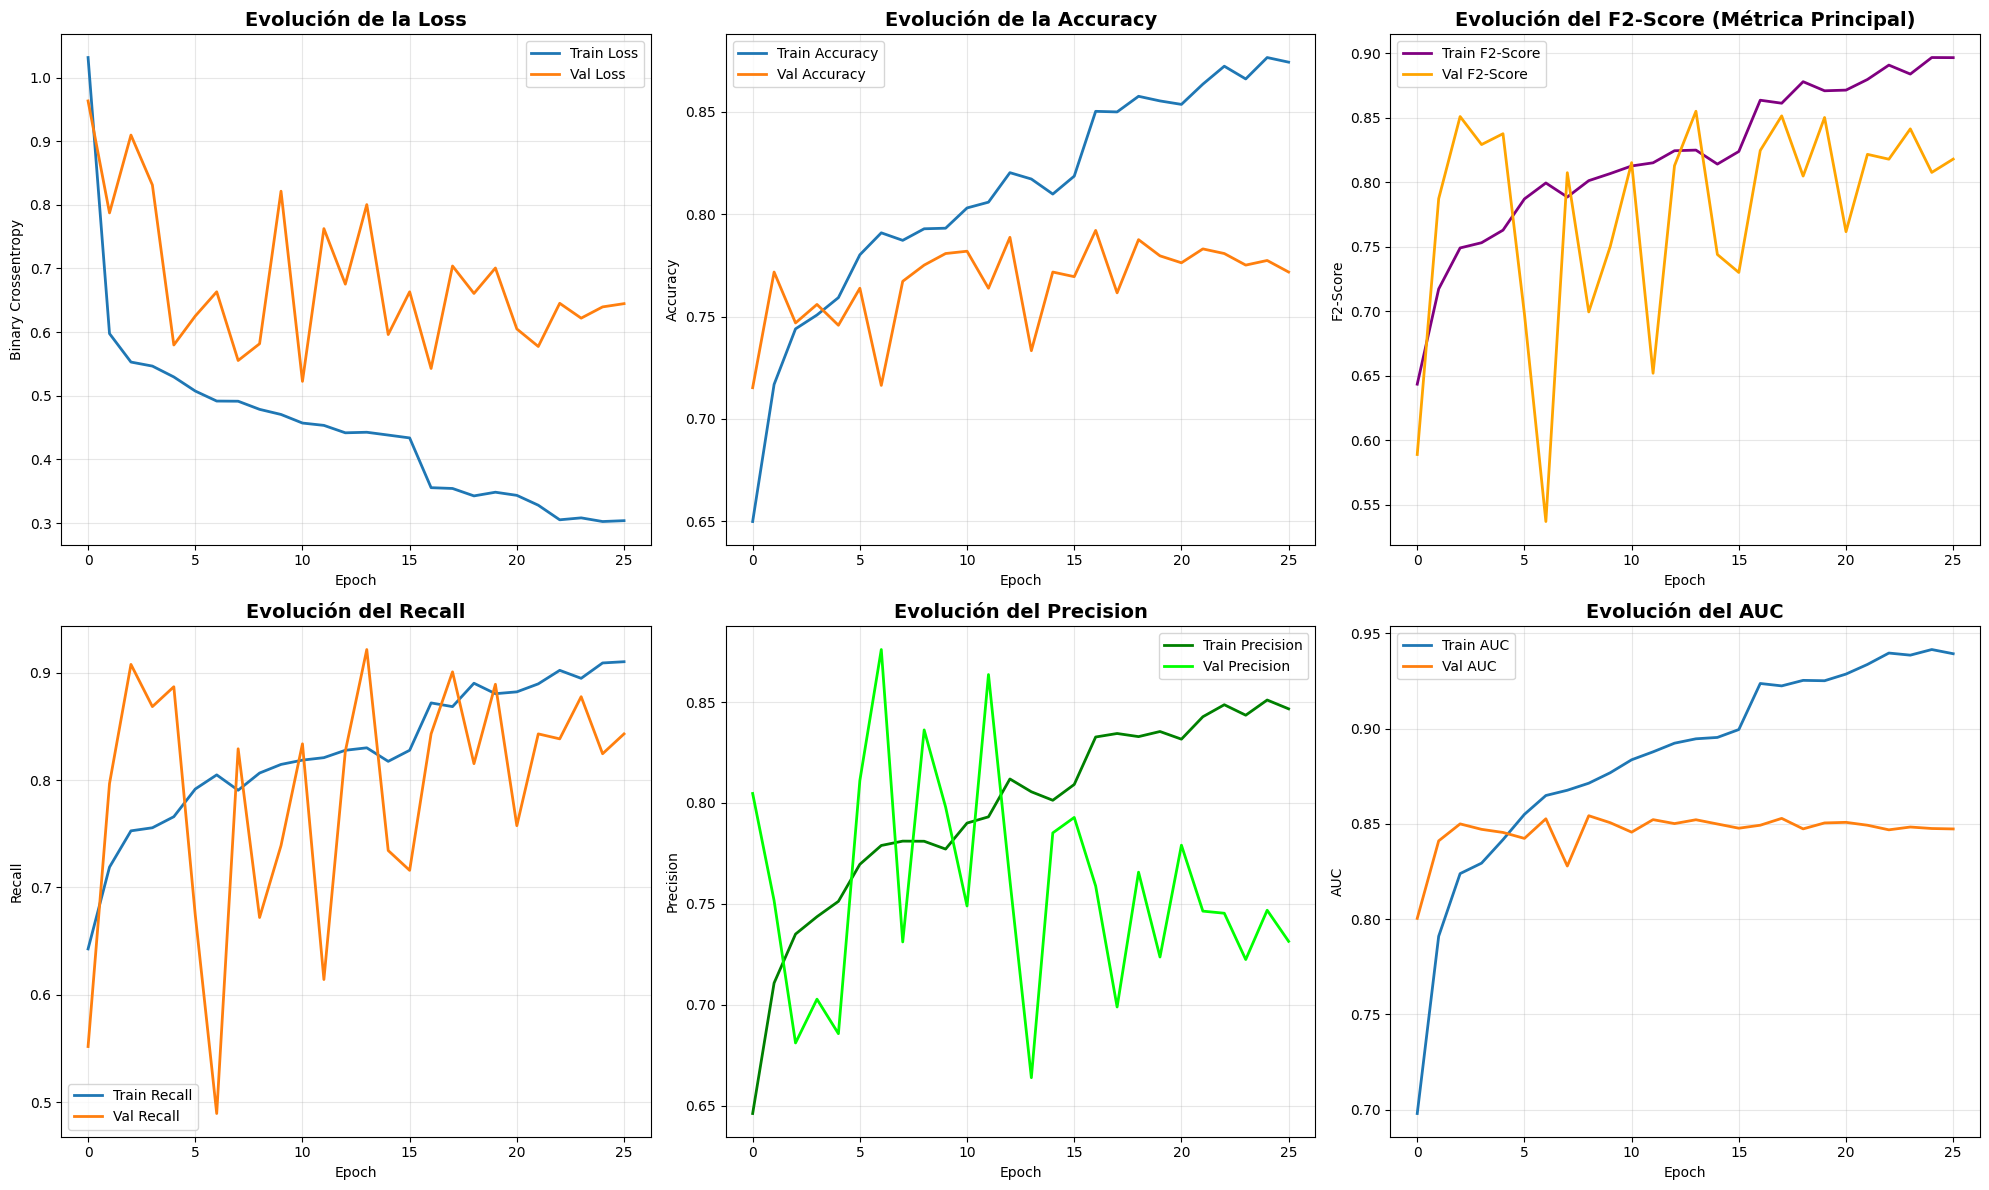

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


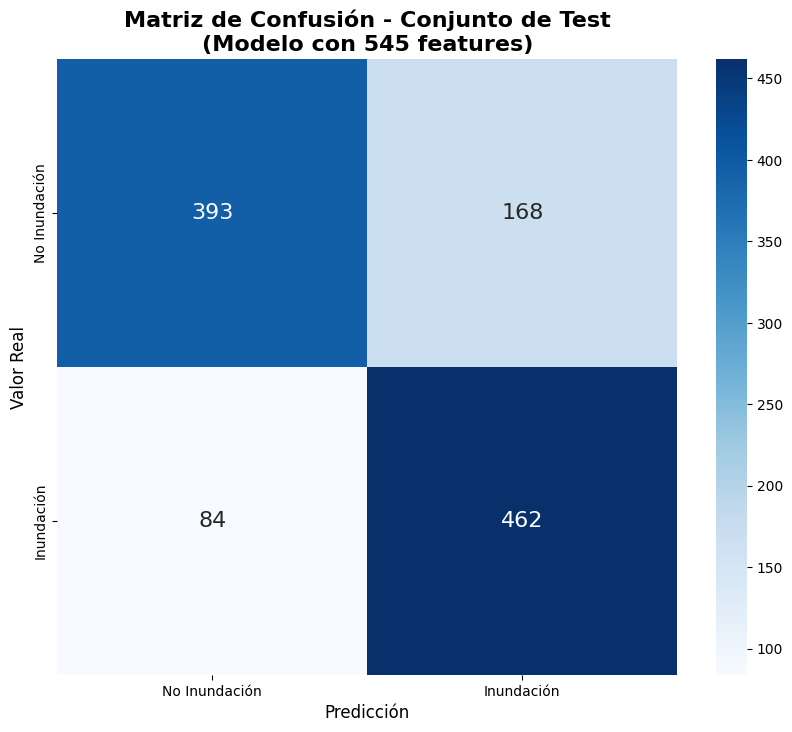


📊 Reporte de Clasificación:
               precision    recall  f1-score   support

No Inundación     0.8239    0.7005    0.7572       561
   Inundación     0.7333    0.8462    0.7857       546

     accuracy                         0.7724      1107
    macro avg     0.7786    0.7733    0.7715      1107
 weighted avg     0.7792    0.7724    0.7713      1107


🏗️ Arquitectura del mejor modelo:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       279,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 288)            │       147,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 288)            │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,972 (3.28 MB)

 Trainable params: 429,185 (1.64 MB)

 Non-trainable params: 1,600 (6.25 KB)

 Optimizer params: 429,187 (1.64 MB)

In [13]:
# Visualización de resultados del entrenamiento
import matplotlib.pyplot as plt

# Graficar la evolución del entrenamiento
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('Evolución de la Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Binary Crossentropy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 1].set_title('Evolución de la Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# F2-Score (MÉTRICA PRINCIPAL)
axes[0, 2].plot(history.history['f2_score'], label='Train F2-Score', linewidth=2, color='purple')
axes[0, 2].plot(history.history['val_f2_score'], label='Val F2-Score', linewidth=2, color='orange')
axes[0, 2].set_title('Evolución del F2-Score (Métrica Principal)', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('F2-Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Recall
axes[1, 0].plot(history.history['recall'], label='Train Recall', linewidth=2)
axes[1, 0].plot(history.history['val_recall'], label='Val Recall', linewidth=2)
axes[1, 0].set_title('Evolución del Recall', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Precision
axes[1, 1].plot(history.history['precision'], label='Train Precision', linewidth=2, color='green')
axes[1, 1].plot(history.history['val_precision'], label='Val Precision', linewidth=2, color='lime')
axes[1, 1].set_title('Evolución del Precision', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# AUC
axes[1, 2].plot(history.history['auc'], label='Train AUC', linewidth=2)
axes[1, 2].plot(history.history['val_auc'], label='Val AUC', linewidth=2)
axes[1, 2].set_title('Evolución del AUC', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('AUC')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Matriz de confusión en el conjunto de test
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Inundación', 'Inundación'],
            yticklabels=['No Inundación', 'Inundación'],
            annot_kws={'size': 16})
plt.title('Matriz de Confusión - Conjunto de Test\n(Modelo con 545 features)', fontsize=16, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.show()

# Reporte de clasificación
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Inundación', 'Inundación'],
                          digits=4))

# Mostrar el resumen del mejor modelo
print("\n🏗️ Arquitectura del mejor modelo:")
best_model.summary()

📊 PREDICCIONES CON PROBABILIDADES
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Ejemplos de predicciones (primeros 20 casos del test):
----------------------------------------------------------------------
Índice   Probabilidad    Predicción      Real      
----------------------------------------------------------------------
0        0.3171 (= 31.7%)   No Inundación ✗ No Inundación ✓
1        0.0075 (=  0.8%)   No Inundación ✗ No Inundación ✓
2        0.5487 (= 54.9%)   Inundación ✓    Inundación ✓
3        0.8277 (= 82.8%)   Inundación ✓    No Inundación ✗
4        0.6655 (= 66.6%)   Inundación ✓    Inundación ✓
5        0.8859 (= 88.6%)   Inundación ✓    Inundación ✓
6        0.1636 (= 16.4%)   No Inundación ✗ No Inundación ✓
7        0.8742 (= 87.4%)   Inundación ✓    Inundación ✓
8        0.9051 (= 90.5%)   Inundación ✓    Inundación ✓
9        0.0480 (=  4.8%)   No Inundación ✗ No Inundación ✓
10       0.0055 (=  0.5%)   No Inundación ✗ No Inunda

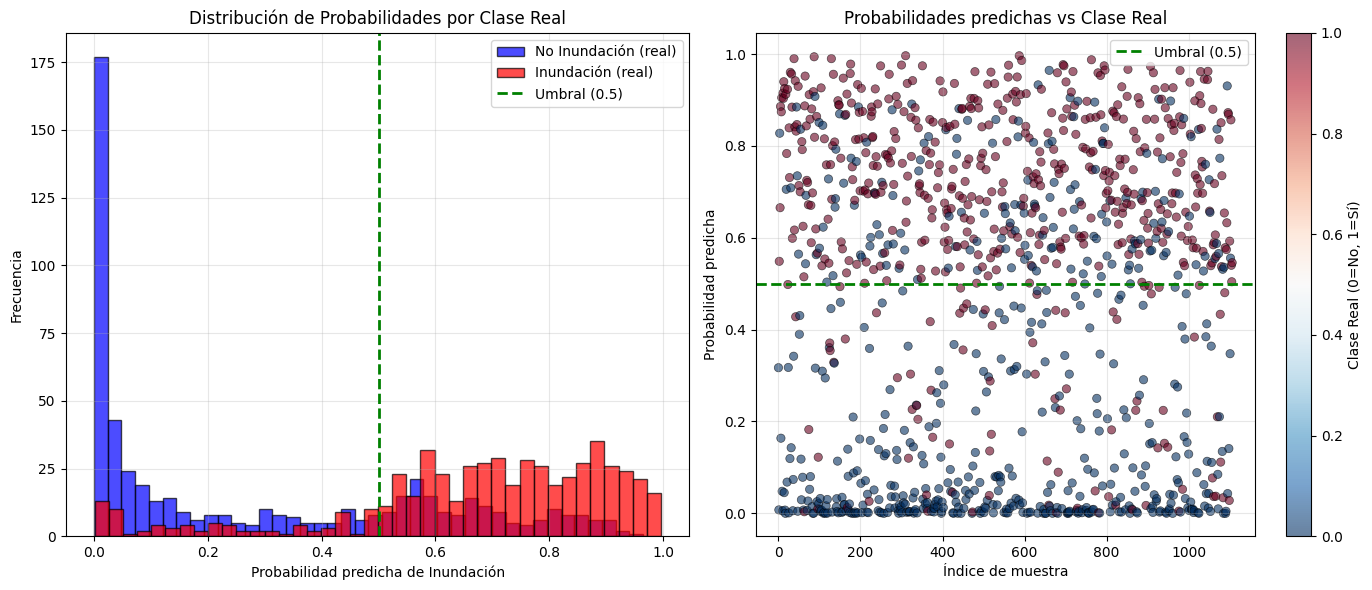


ℹ️  INTERPRETACIÓN:
• El modelo devuelve un valor entre 0.0 y 1.0
• 0.0 = 0% de probabilidad de inundación (casi seguro que NO)
• 0.5 = 50% de probabilidad (umbral de decisión)
• 1.0 = 100% de probabilidad de inundación (casi seguro que SÍ)
• Valores cercanos a 0 o 1 indican alta confianza
• Valores cerca de 0.5 indican incertidumbre

💡 Para usar el modelo con nuevos datos:
   probabilidad = predecir_inundacion(datos_nuevos)
   donde 'datos_nuevos' debe tener las mismas 545 columnas que X_train


In [14]:
# 🎯 Predicciones con probabilidades
# El modelo devuelve un valor entre 0 y 1 que representa la probabilidad de inundación

print("="*70)
print("📊 PREDICCIONES CON PROBABILIDADES")
print("="*70)

# Obtener probabilidades para el conjunto de test
probabilidades = best_model.predict(X_test_scaled).flatten()

# Mostrar ejemplos de predicciones
print("\nEjemplos de predicciones (primeros 20 casos del test):")
print("-" * 70)
print(f"{'Índice':<8} {'Probabilidad':<15} {'Predicción':<15} {'Real':<10}")
print("-" * 70)

for i in range(min(20, len(y_test))):
    prob = probabilidades[i]
    pred_class = "Inundación ✓" if prob > 0.5 else "No Inundación ✗"
    real_class = "Inundación" if y_test[i] == 1 else "No Inundación"
    correcto = "✓" if (prob > 0.5) == (y_test[i] == 1) else "✗"
    
    print(f"{i:<8} {prob:>6.4f} (={prob*100:5.1f}%)   {pred_class:<15} {real_class:<10} {correcto}")

print("-" * 70)

# Distribución de probabilidades
print("\n📈 Distribución de probabilidades predichas:")
print(f"  Mínimo: {probabilidades.min():.4f}")
print(f"  Máximo: {probabilidades.max():.4f}")
print(f"  Media: {probabilidades.mean():.4f}")
print(f"  Mediana: {np.median(probabilidades):.4f}")

# Histograma de probabilidades
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(probabilidades[y_test == 0], bins=40, alpha=0.7, label='No Inundación (real)', color='blue', edgecolor='black')
plt.hist(probabilidades[y_test == 1], bins=40, alpha=0.7, label='Inundación (real)', color='red', edgecolor='black')
plt.axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='Umbral (0.5)')
plt.xlabel('Probabilidad predicha de Inundación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades por Clase Real')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(range(len(probabilidades)), probabilidades, 
           c=y_test, cmap='RdBu_r', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Umbral (0.5)')
plt.xlabel('Índice de muestra')
plt.ylabel('Probabilidad predicha')
plt.title('Probabilidades predichas vs Clase Real')
plt.colorbar(label='Clase Real (0=No, 1=Sí)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ℹ️  INTERPRETACIÓN:")
print("="*70)
print("• El modelo devuelve un valor entre 0.0 y 1.0")
print("• 0.0 = 0% de probabilidad de inundación (casi seguro que NO)")
print("• 0.5 = 50% de probabilidad (umbral de decisión)")
print("• 1.0 = 100% de probabilidad de inundación (casi seguro que SÍ)")
print("• Valores cercanos a 0 o 1 indican alta confianza")
print("• Valores cerca de 0.5 indican incertidumbre")
print("="*70)

# Función auxiliar para hacer predicciones individuales
def predecir_inundacion(datos_nuevos, mostrar_detalle=True):
    """
    Predice la probabilidad de inundación para datos nuevos.
    
    Args:
        datos_nuevos: array o DataFrame con las mismas 545 features que el entrenamiento
        mostrar_detalle: si True, muestra interpretación detallada
    
    Returns:
        probabilidad: valor entre 0 y 1
    """
    # Escalar los datos nuevos
    datos_escalados = scaler.transform(datos_nuevos)
    
    # Predecir
    prob = best_model.predict(datos_escalados, verbose=0).flatten()[0]
    
    if mostrar_detalle:
        print(f"\n🔮 Predicción:")
        print(f"   Probabilidad de inundación: {prob:.4f} ({prob*100:.2f}%)")
        print(f"   Probabilidad de NO inundación: {1-prob:.4f} ({(1-prob)*100:.2f}%)")
        
        if prob > 0.8:
            print(f"   ⚠️  ALTA probabilidad de inundación")
        elif prob > 0.5:
            print(f"   ⚡ Probabilidad moderada de inundación")
        elif prob > 0.2:
            print(f"   ✓ Baja probabilidad de inundación")
        else:
            print(f"   ✓✓ MUY baja probabilidad de inundación")
    
    return prob

print("\n💡 Para usar el modelo con nuevos datos:")
print("   probabilidad = predecir_inundacion(datos_nuevos)")
print(f"   donde 'datos_nuevos' debe tener las mismas {len(features)} columnas que X_train")


📊 ANÁLISIS DE UMBRALES DE DECISIÓN

🎯 Umbral: 0.3
   Accuracy:  0.7471
   Recall:    0.9048
   Precision: 0.6842
   F1-Score:  0.7792
   F2-Score:  0.8500  ← Métrica optimizada

🎯 Umbral: 0.4
   Accuracy:  0.7651
   Recall:    0.8883
   Precision: 0.7091
   F1-Score:  0.7886
   F2-Score:  0.8455  ← Métrica optimizada

🎯 Umbral: 0.5
   Accuracy:  0.7724
   Recall:    0.8462
   Precision: 0.7333
   F1-Score:  0.7857
   F2-Score:  0.8209  ← Métrica optimizada

🎯 Umbral: 0.6
   Accuracy:  0.7507
   Recall:    0.6923
   Precision: 0.7778
   F1-Score:  0.7326
   F2-Score:  0.7079  ← Métrica optimizada

🎯 Umbral: 0.7
   Accuracy:  0.7082
   Recall:    0.5256
   Precision: 0.8177
   F1-Score:  0.6399
   F2-Score:  0.5661  ← Métrica optimizada


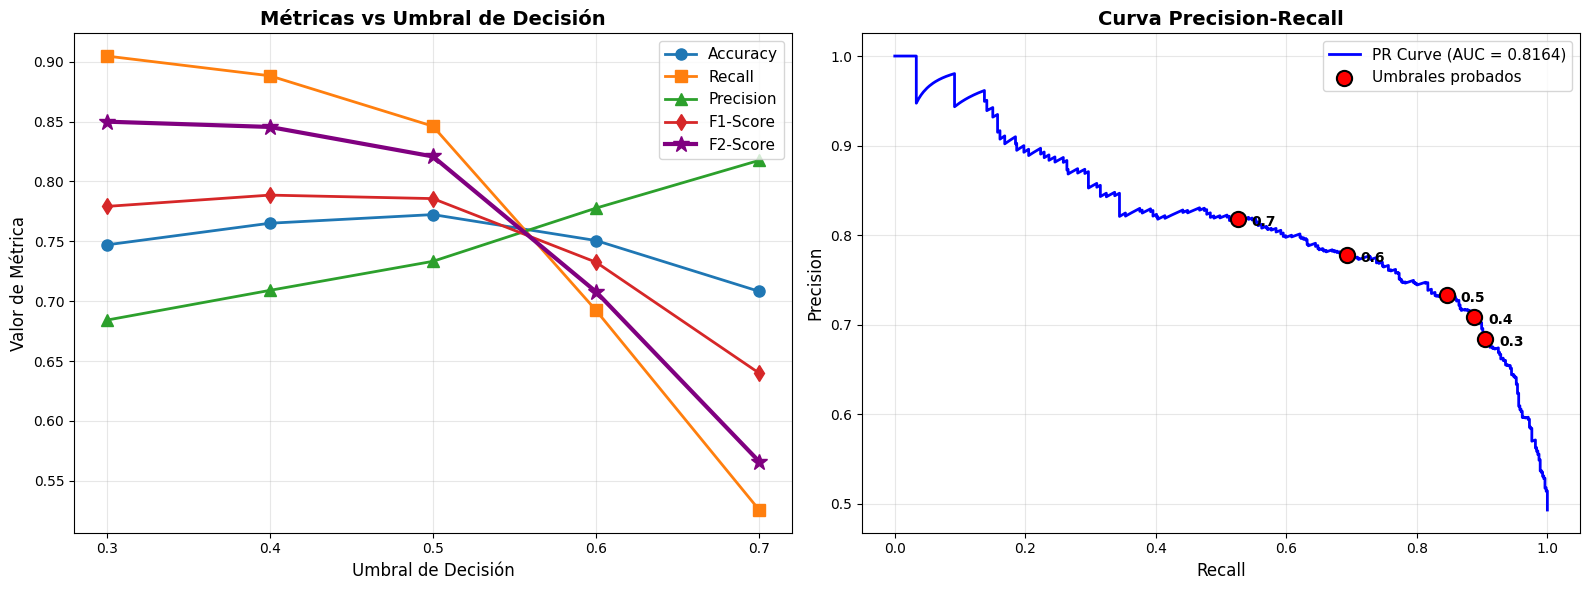


📋 Tabla de Resultados por Umbral:
 Umbral  Accuracy   Recall  Precision  F1-Score  F2-Score
    0.3  0.747064 0.904762   0.684211  0.779180  0.849966
    0.4  0.765131 0.888278   0.709064  0.788618  0.845537
    0.5  0.772358 0.846154   0.733333  0.785714  0.820896
    0.6  0.750678 0.692308   0.777778  0.732558  0.707865
    0.7  0.708220 0.525641   0.817664  0.639911  0.566075

💡 RECOMENDACIONES

🔹 Umbral 0.3-0.4: Mayor Recall - Detecta más inundaciones pero con más falsos positivos
   → Usar cuando el costo de perder una inundación real es alto

🔹 Umbral 0.5: Balance estándar - Equilibrio entre Precision y Recall
   → Usar como punto de partida para aplicaciones generales

🔹 Umbral 0.6-0.7: Mayor Precision - Menos falsos positivos pero puede perder inundaciones
   → Usar cuando se necesita alta confianza en las predicciones positivas

🏆 Mejor umbral según F2-Score: 0.3 (F2 = 0.8500)  ← Métrica optimizada
   Comparación F1-Score: 0.4 (F1 = 0.7886)


In [15]:
# 📊 Análisis de Umbrales
print("\n" + "="*60)
print("📊 ANÁLISIS DE UMBRALES DE DECISIÓN")
print("="*60)

from sklearn.metrics import precision_recall_curve, auc

# Probar diferentes umbrales
umbrales = [0.3, 0.4, 0.5, 0.6, 0.7]
resultados = []

for umbral in umbrales:
    y_pred_umbral = (y_pred_proba >= umbral).astype(int).flatten()
    
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    
    acc = accuracy_score(y_test, y_pred_umbral)
    recall = recall_score(y_test, y_pred_umbral)
    precision = precision_score(y_test, y_pred_umbral)
    f1 = f1_score(y_test, y_pred_umbral)
    f2 = fbeta_score(y_test, y_pred_umbral, beta=2)
    
    resultados.append({
        'Umbral': umbral,
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1,
        'F2-Score': f2
    })
    
    print(f"\n🎯 Umbral: {umbral}")
    print(f"   Accuracy:  {acc:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   F2-Score:  {f2:.4f}  ← Métrica optimizada")

# Crear DataFrame con los resultados
df_umbrales = pd.DataFrame(resultados)

# Visualización de umbrales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Métricas vs Umbral
axes[0].plot(df_umbrales['Umbral'], df_umbrales['Accuracy'], marker='o', label='Accuracy', linewidth=2, markersize=8)
axes[0].plot(df_umbrales['Umbral'], df_umbrales['Recall'], marker='s', label='Recall', linewidth=2, markersize=8)
axes[0].plot(df_umbrales['Umbral'], df_umbrales['Precision'], marker='^', label='Precision', linewidth=2, markersize=8)
axes[0].plot(df_umbrales['Umbral'], df_umbrales['F1-Score'], marker='d', label='F1-Score', linewidth=2, markersize=8)
axes[0].plot(df_umbrales['Umbral'], df_umbrales['F2-Score'], marker='*', label='F2-Score', linewidth=3, markersize=12, color='purple')
axes[0].set_xlabel('Umbral de Decisión', fontsize=12)
axes[0].set_ylabel('Valor de Métrica', fontsize=12)
axes[0].set_title('Métricas vs Umbral de Decisión', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(umbrales)

# Gráfico 2: Curva Precision-Recall
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba.flatten())
pr_auc = auc(recall_vals, precision_vals)

axes[1].plot(recall_vals, precision_vals, linewidth=2, label=f'PR Curve (AUC = {pr_auc:.4f})', color='blue')
axes[1].scatter(df_umbrales['Recall'], df_umbrales['Precision'], 
                c='red', s=120, zorder=5, label='Umbrales probados', edgecolors='black', linewidth=1.5)

# Anotar los umbrales
for i, umbral in enumerate(umbrales):
    axes[1].annotate(f'{umbral}', 
                     (df_umbrales['Recall'].iloc[i], df_umbrales['Precision'].iloc[i]),
                     textcoords="offset points", xytext=(10, -5), fontsize=10, fontweight='bold')

axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Curva Precision-Recall', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar tabla de resultados
print("\n📋 Tabla de Resultados por Umbral:")
print(df_umbrales.to_string(index=False))

# Recomendaciones
print("\n" + "="*60)
print("💡 RECOMENDACIONES")
print("="*60)
print("\n🔹 Umbral 0.3-0.4: Mayor Recall - Detecta más inundaciones pero con más falsos positivos")
print("   → Usar cuando el costo de perder una inundación real es alto")
print("\n🔹 Umbral 0.5: Balance estándar - Equilibrio entre Precision y Recall")
print("   → Usar como punto de partida para aplicaciones generales")
print("\n🔹 Umbral 0.6-0.7: Mayor Precision - Menos falsos positivos pero puede perder inundaciones")
print("   → Usar cuando se necesita alta confianza en las predicciones positivas")

# Identificar el mejor umbral según F2-Score
best_idx_f2 = df_umbrales['F2-Score'].idxmax()
best_threshold_f2 = df_umbrales.loc[best_idx_f2, 'Umbral']
best_f2 = df_umbrales.loc[best_idx_f2, 'F2-Score']

# También mostrar el mejor según F1-Score para comparación
best_idx_f1 = df_umbrales['F1-Score'].idxmax()
best_threshold_f1 = df_umbrales.loc[best_idx_f1, 'Umbral']
best_f1 = df_umbrales.loc[best_idx_f1, 'F1-Score']

print(f"\n🏆 Mejor umbral según F2-Score: {best_threshold_f2} (F2 = {best_f2:.4f})  ← Métrica optimizada")
print(f"   Comparación F1-Score: {best_threshold_f1} (F1 = {best_f1:.4f})")